Question 1: What percentage of days had returns below -2%?
-> This means you want to know how often the stock performs very poorly (less than -2%).

Question 2: What return corresponds to the top 5% of best days?
->  This means you want to know the daily return threshold that separates the top 5% of the best-performing days from the rest.



In [52]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import zscore

In [2]:
tata_df = pd.read_csv('../dataset/Tata_Motors_Ltd._historical_data.csv')

In [3]:
tata_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,43.5,43.5,43.5,43.5,16.114737,0
1,2000-01-04,43.5,43.5,43.5,43.5,16.114737,0
2,2000-01-05,43.5,43.5,43.5,43.5,16.114737,0
3,2000-01-06,43.5,43.5,43.5,43.5,16.114737,0
4,2000-01-07,43.5,43.5,43.5,43.5,16.114737,0


In [5]:
tata_df['Date'].unique()

array(['2000-01-03', '2000-01-04', '2000-01-05', ..., '2023-08-30',
       '2023-08-31', '2023-09-01'], dtype=object)

In [8]:
tata_df.shape

(5886, 7)

In [19]:
tata_df['daily_return'] = ((tata_df['Close'] - tata_df['Open'] ) / tata_df['Close']) * 100

5881    606.299988
5882    604.900024
5883    611.200012
5884    608.049988
5885    603.549988
Name: Open, dtype: float64

<Axes: xlabel='daily_return'>

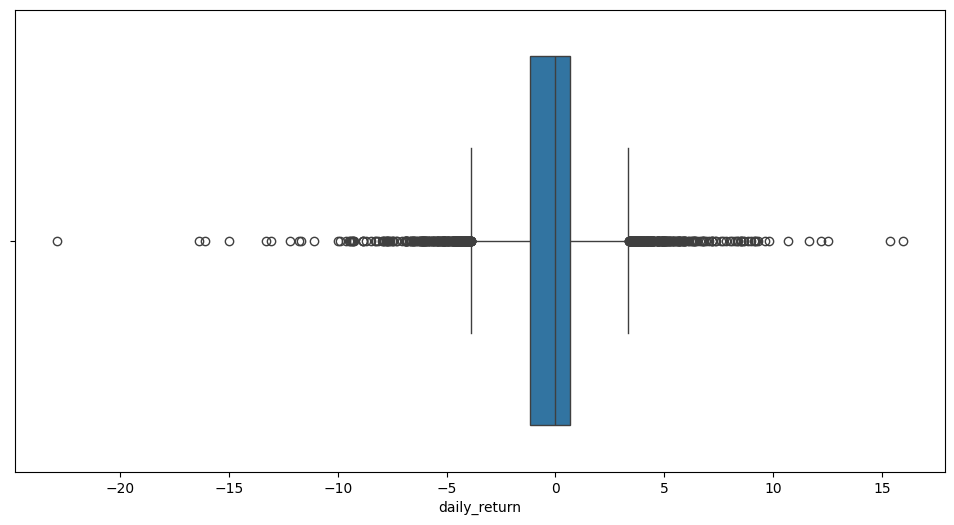

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(tata_df['daily_return'],orient='h')

In [21]:
return_mean = tata_df['daily_return'].mean()
retur_std = tata_df['daily_return'].std()

probability of getting daily return < -2%  is: 20.32%


0.20323942671331746

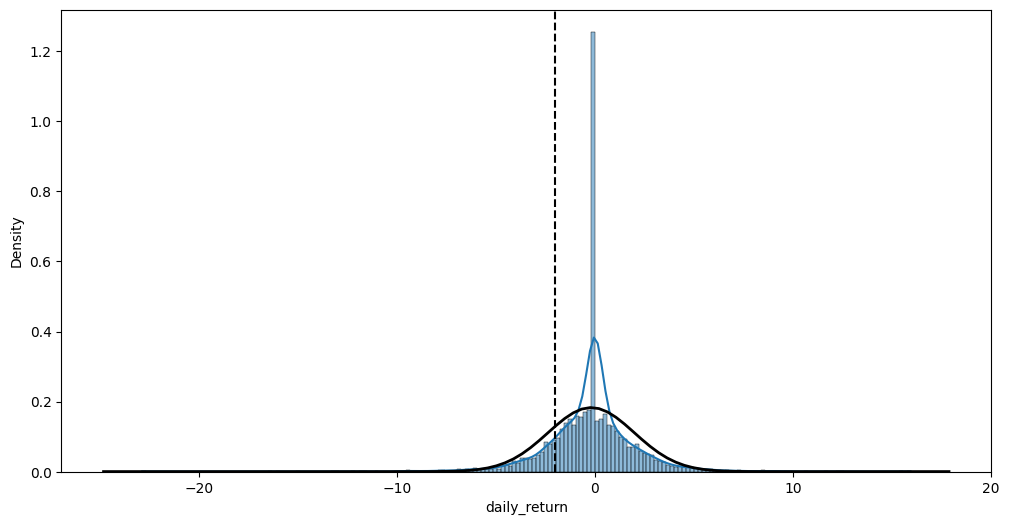

In [56]:
plt.figure(figsize=(12,6))
threshold = -2

sns.histplot(tata_df['daily_return'],kde=True,stat='density')
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.cdf(threshold,return_mean,retur_std)
pdf = norm.pdf(x,return_mean,retur_std)
plt.plot(x,pdf,'k',linewidth=2,label="Normal ditribution (pdf)")
plt.axvline(x=threshold,linestyle='--',color='black')


Question 2: What return corresponds to the top 5% of best days?
-> This means you want to know the daily return threshold that separates the top 5% of the best-performing days from the rest.

0.5217185713029867
0.6990668538601155


In [66]:
zscore_95 = norm.ppf(0.95)  # 95th percentile corresponds to z-score
print(f"Z-score for 95th percentile: {zscore_95}")

# If you want to convert this z-score to the actual value (threshold) in the dataset
threshold_95 = return_mean + zscore_95 * retur_std
print(f"Threshold corresponding to 95th percentile: {threshold_95}")

# Find the percentile (this step is unnecessary since we already know it's 95%)
percentile = norm.cdf(zscore_95)  # This should return 0.95
print(f"Percentile for the z-score {zscore_95}: {percentile}")

Z-score for 95th percentile: 1.6448536269514722
Threshold corresponding to 95th percentile: 3.4009455423480537
Percentile for the z-score 1.6448536269514722: 0.95


0.95